<a href="https://colab.research.google.com/github/DANIEL20625/homework/blob/main/homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycaret 
import pycaret

In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt # for cool graphics
import seaborn as sb # even cooler graphics

In [2]:
BusinessAnalyst = pd.read_csv("drive/MyDrive/BusinessAnalyst.csv")
DataAnalyst = pd.read_csv("drive/MyDrive/DataAnalyst.csv")
DataEngineer = pd.read_csv("drive/MyDrive/DataEngineer.csv")
DataScientist = pd.read_csv("drive/MyDrive/DataScientist.csv")

## ***步驟2.資料合併***
# 初步讀入資料後可以發現各個資料的欄位數量並不一樣

In [ ]:
BusinessAnalyst.shape

(4092, 17)

In [ ]:
DataAnalyst.shape

(2253, 16)

In [ ]:
DataEngineer.shape

(2528, 15)

In [ ]:
DataScientist.shape

(3909, 17)

# 欲確認四個資料之間缺少那些欄位，我以BusinessAnalyst 中17個欄位為標準，判斷其他資料與之相差欄位

In [ ]:
BusinessAnalyst_col = list(BusinessAnalyst.columns)
DataAnalyst_col = list(DataAnalyst.columns)
DataEngineer_col = list(DataEngineer.columns)
DataScientist_col = list(DataScientist.columns)
col = ['Data','Common_col','Missing_col']
col_missing = pd.DataFrame(columns=col)
col_missing = pd.concat([col_missing,pd.DataFrame([{'Data': 'BusinessAnalyst','Common_col':','.join([x for x in BusinessAnalyst_col if x in BusinessAnalyst_col]), 'Missing_col': ','.join([x for x in BusinessAnalyst_col if x not in BusinessAnalyst_col])}])])
col_missing = pd.concat([col_missing,pd.DataFrame([{'Data': 'DataAnalyst','Common_col':','.join([x for x in BusinessAnalyst_col if x in DataAnalyst_col]), 'Missing_col': ','.join([x for x in BusinessAnalyst_col if x not in DataAnalyst_col])}])])
col_missing = pd.concat([col_missing,pd.DataFrame([{'Data': 'DataEngineer','Common_col':','.join([x for x in BusinessAnalyst_col if x in DataEngineer_col]), 'Missing_col': ','.join([x for x in BusinessAnalyst_col if x not in DataEngineer_col])}])])
col_missing = pd.concat([col_missing,pd.DataFrame([{'Data': 'DataScientist','Common_col':','.join([x for x in BusinessAnalyst_col if x in DataScientist_col]) ,'Missing_col': ','.join([x for x in BusinessAnalyst_col if x not in DataScientist_col])}])])
col_missing

,Data,Common_col,Missing_col
0,BusinessAnalyst,"Unnamed: 0,index,Job Title,Salary Estimate,Job...",
0,DataAnalyst,"Unnamed: 0,Job Title,Salary Estimate,Job Descr...",index
0,DataEngineer,"Job Title,Salary Estimate,Job Description,Rati...","Unnamed: 0,index"
0,DataScientist,"Unnamed: 0,index,Job Title,Salary Estimate,Job...",


**可以發現相差的欄位命名為 [index,Unnamed: 0] 初步判斷與資料內容無太大相關，之後細看合併時可以考慮drop掉** 

In [ ]:
BusinessAnalyst.describe().transpose()

,count,unique,top,freq
Unnamed: 0,4092,3962,Business Analyst,16
index,4092,3706,$35K-$65K (Glassdoor est.),30
Job Title,4092,2210,Business Analyst,502
Salary Estimate,4092,167,$43K-$78K (Glassdoor est.),60
Job Description,4092,3732,Citi\n3.7,22
Rating,4092,41,"Jacksonville, FL",392
Company Name,4092,2197,"Staffigo Technical Services, LLC\n5.0",156
Location,4092,218,"San Diego, CA",348
Headquarters,4092,625,-1,316
Size,4092,17,10000+ employees,717


In [ ]:
BusinessAnalyst.head(5)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Business Analyst - Clinical & Logistics Platform,$56K-$102K (Glassdoor est.),Company Overview\n\n\nAt Memorial Sloan Ketter...,3.9,Memorial Sloan-Kettering\n3.9,"New York, NY","New York, NY",10000+ employees,1884,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),"Mayo Clinic, The Johns Hopkins Hospital, MD An...",-1
1,1,1,Business Analyst,$56K-$102K (Glassdoor est.),We are seeking for an energetic and collaborat...,3.8,Paine Schwartz Partners\n3.8,"New York, NY","New York, NY",1 to 50 employees,-1,Company - Private,Venture Capital & Private Equity,Finance,Unknown / Non-Applicable,-1,True
2,2,2,Data Analyst,$56K-$102K (Glassdoor est.),"For more than a decade, Asembia has been worki...",3.6,Asembia\n3.6,"Florham Park, NJ","Florham Park, NJ",501 to 1000 employees,2004,Company - Private,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$5 to $10 million (USD),-1,-1
3,3,3,"Information Security Analyst, Incident Response",$56K-$102K (Glassdoor est.),Job Description Summary\nThe Information Secur...,3.6,BD\n3.6,"Franklin Lakes, NJ","Franklin Lakes, NJ",10000+ employees,1897,Company - Public,Health Care Products Manufacturing,Manufacturing,$10+ billion (USD),"Abbott, Siemens, Baxter",-1
4,4,4,Analyst - FP&A Global Revenue,$56K-$102K (Glassdoor est.),Magnite is the world's largest independent sel...,3.4,Rubicon Project\n3.4,"New York, NY","Los Angeles, CA",201 to 500 employees,2007,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"PubMatic, AppNexus, Index Exchange",True


In [ ]:
BusinessAnalyst.tail(5)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
4087,Help Desk Analyst,$66K-$114K (Glassdoor est.),Ref ID: 01120-0011488945Classification: Help D...,3.5,Robert Half\n3.5,"Jacksonville, FL","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1,NaN,NaN
4088,System Analyst (Data) - PL/SQl Server,$66K-$114K (Glassdoor est.),Job Title: System Analyst (Data) - PL/SQl Serv...,3.9,Diverse Lynx\n3.9,"Jacksonville, FL","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1,NaN,NaN
4089,Programmer Analyst- PeopleSoft ( Finance and S...,$66K-$114K (Glassdoor est.),Job Opening Summary\nReports to the Systems Ap...,4.0,Shands at the University of Florida\n4.0,"Jacksonville, FL","Gainesville, FL",10000+ employees,-1,Subsidiary or Business Segment,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist...",-1,NaN,NaN
4090,Loss Mitigation Analyst,$66K-$114K (Glassdoor est.),Job Description\nA knowledgeable job-seeker is...,4.4,Contemporary Staffing Solutions\n4.4,"Jacksonville, FL","Mount Laurel, NJ",1001 to 5000 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Rob...",-1,NaN,NaN
4091,Financial Analyst II - Baptist,$66K-$114K (Glassdoor est.),Job Summary\n\nThis unique analyst position re...,2.7,Baptist Medical Center Jacksonville\n2.7,"Jacksonville, FL","Jacksonville, FL",5001 to 10000 employees,-1,Hospital,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),-1,-1,NaN,NaN


BusinessAnalyst 這個資料集 應該只有數值的欄位 [Unnamed: 0,index] 卻出現文字，資料不是很乾淨,後面的資料有位移往前兩個欄位


In [ ]:
len(DataAnalyst['Unnamed: 0'].unique())== DataAnalyst.shape[0]

True

In [ ]:
len(DataScientist['index'].unique()) == len(DataScientist['Unnamed: 0'].unique()) | len(DataScientist['index'].unique()) == DataScientist.shape[0]

True

In [ ]:
DataScientist = DataScientist.drop(["Unnamed: 0","index"], axis = 1)

In [ ]:
DataAnalyst = DataAnalyst.drop("Unnamed: 0", axis = 1)

因為 DataEngineer 這個資料集 沒有  [Unnamed: 0,index] 應該是不會有跑位情況之後合併再判斷， 剩下兩個資料集 index 與 Unnamed: 0 數量都吻合資料筆數所以沒有跑位問題

In [ ]:
nan_case = BusinessAnalyst[pd.isna(BusinessAnalyst['Easy Apply'])]
normal_case = BusinessAnalyst[pd.isna(BusinessAnalyst['Easy Apply'])==False]

In [ ]:
normal_case.describe().transpose()

,count,unique,top,freq
Unnamed: 0,3692,3692,0,1
index,3692,3692,0,1
Job Title,3692,1865,Business Analyst,502
Salary Estimate,3692,138,$43K-$78K (Glassdoor est.),60
Job Description,3692,3560,"We are:\n\nAccenture Technology, the people wh...",8
Rating,3692,35,-1.0,318
Company Name,3692,2102,"Staffigo Technical Services, LLC\n5.0",156
Location,3692,209,"San Diego, CA",348
Headquarters,3692,563,"New York, NY",210
Size,3692,9,10000+ employees,717


In [ ]:
nan_case_clear = nan_case.drop(["Competitors","Easy Apply"], axis = 1)
normal_case = normal_case.drop(["Unnamed: 0","index"], axis = 1)
nan_case_clear.columns = normal_case.columns
nan_case_clear

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
3692,Business Analyst - Loan IQ Specialist,$50K-$78K (Glassdoor est.),Business Analyst - Loan IQ Specialist\n\n\nJac...,3.3,Macquarie Group\n3.3,"Jacksonville, FL","Sydney, Australia",10000+ employees,1969,Company - Public,Investment Banking & Asset Management,Finance,$5 to $10 billion (USD),"Goldman Sachs, Commonwealth Bank of Australia,...",-1
3693,Procure to Pay Analyst,$50K-$78K (Glassdoor est.),Job Summary\n\nWorks daily to resolve complex ...,2.3,CSX\n2.3,"Jacksonville, FL","Jacksonville, FL",10000+ employees,1978,Company - Public,Transportation Management,Transportation & Logistics,$10+ billion (USD),"Union Pacific, BNSF Railway",-1
3694,Payroll Analyst,$50K-$78K (Glassdoor est.),Job Summary\nSupports the Train and Engine (T&...,2.3,CSX\n2.3,"Jacksonville, FL","Jacksonville, FL",10000+ employees,1978,Company - Public,Transportation Management,Transportation & Logistics,$10+ billion (USD),"Union Pacific, BNSF Railway",-1
3695,Software Quality Assurance Analyst,$50K-$78K (Glassdoor est.),SUMMARY\n\nThe Software Quality Assurance (SQA...,3.9,AdTheorent\n3.9,"Jacksonville, FL","New York, NY",201 to 500 employees,2011,Company - Private,Advertising & Marketing,Business Services,$100 to $500 million (USD),-1,-1
3696,Senior Support Analyst,$50K-$78K (Glassdoor est.),Vacancy Name Senior Support Analyst\nVacancy R...,3.2,SmartStream Technologies\n3.2,"Jacksonville, FL","London, United Kingdom",501 to 1000 employees,2000,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4087,Help Desk Analyst,$66K-$114K (Glassdoor est.),Ref ID: 01120-0011488945Classification: Help D...,3.5,Robert Half\n3.5,"Jacksonville, FL","Menlo Park, CA",10000+ employees,1948,Company - Public,Staffing & Outsourcing,Business Services,$2 to $5 billion (USD),"Adecco, Manpower",-1
4088,System Analyst (Data) - PL/SQl Server,$66K-$114K (Glassdoor est.),Job Title: System Analyst (Data) - PL/SQl Serv...,3.9,Diverse Lynx\n3.9,"Jacksonville, FL","Princeton, NJ",501 to 1000 employees,2002,Company - Private,IT Services,Information Technology,$100 to $500 million (USD),-1,-1
4089,Programmer Analyst- PeopleSoft ( Finance and S...,$66K-$114K (Glassdoor est.),Job Opening Summary\nReports to the Systems Ap...,4.0,Shands at the University of Florida\n4.0,"Jacksonville, FL","Gainesville, FL",10000+ employees,-1,Subsidiary or Business Segment,Health Care Services & Hospitals,Health Care,$1 to $2 billion (USD),"Mount Sinai Medical Center of Florida, Baptist...",-1
4090,Loss Mitigation Analyst,$66K-$114K (Glassdoor est.),Job Description\nA knowledgeable job-seeker is...,4.4,Contemporary Staffing Solutions\n4.4,"Jacksonville, FL","Mount Laurel, NJ",1001 to 5000 employees,1994,Company - Private,Staffing & Outsourcing,Business Services,$100 to $500 million (USD),"PathFinder Staffing, Juno Search Partners, Rob...",-1


# **步驟2 資料合併結束**

In [ ]:
ALL_Data = pd.concat([DataEngineer,DataAnalyst,DataScientist,nan_case_clear,normal_case])
ALL_Data.drop_duplicates(subset=ALL_Data.columns, keep='first', inplace=True)
ALL_Data.reset_index(drop=True, inplace=True)
ALL_Data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12762,Pega Business Analyst,$58K-$103K (Glassdoor est.),• 5 yrs relevant experience in:- Experience wi...,3.1,Tista Science and Technology Corporation\n3.1,"Austin, TX","Rockville, MD",501 to 1000 employees,2005,Company - Private,Consulting,Business Services,$5 to $10 million (USD),-1,-1
12763,Jr.Business Analyst,$58K-$103K (Glassdoor est.),Job Description\n\nNew businesses are making t...,5.0,"Staffigo Technical Services, LLC\n5.0","Austin, TX","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
12764,Business Process Analyst/Remote 4 mth+ contract,$58K-$103K (Glassdoor est.),Title: Business Process Analyst\nDuration: 4+ ...,-1.0,"Suncap Technology, Inc.","Austin, TX",-1,-1,-1,-1,-1,-1,-1,-1,-1
12765,"AVP, Business System",$58K-$103K (Glassdoor est.),We are looking for a AVP Business System Analy...,3.5,LPL Financial\n3.5,"Austin, TX","Boston, MA",1001 to 5000 employees,1968,Company - Public,Investment Banking & Asset Management,Finance,$2 to $5 billion (USD),"Fidelity Investments, UBS, Morgan Stanley",-1


In [22]:
ALL_Data= pd.read_excel("drive/MyDrive/all_data.xlsx")
ALL_Data

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1
1,1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1
2,2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1
3,3,Client Trade Support Engineer,$80K-$150K (Glassdoor est.),About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1
4,4,Data Engineer,$80K-$150K (Glassdoor est.),Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12762,12762,Pega Business Analyst,$58K-$103K (Glassdoor est.),• 5 yrs relevant experience in:- Experience wi...,3.1,Tista Science and Technology Corporation\n3.1,"Austin, TX","Rockville, MD",501 to 1000 employees,2005,Company - Private,Consulting,Business Services,$5 to $10 million (USD),-1,-1
12763,12763,Jr.Business Analyst,$58K-$103K (Glassdoor est.),Job Description\n\nNew businesses are making t...,5.0,"Staffigo Technical Services, LLC\n5.0","Austin, TX","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
12764,12764,Business Process Analyst/Remote 4 mth+ contract,$58K-$103K (Glassdoor est.),Title: Business Process Analyst\nDuration: 4+ ...,-1.0,"Suncap Technology, Inc.","Austin, TX",-1,-1,-1,-1,-1,-1,-1,-1,-1
12765,12765,"AVP, Business System",$58K-$103K (Glassdoor est.),We are looking for a AVP Business System Analy...,3.5,LPL Financial\n3.5,"Austin, TX","Boston, MA",1001 to 5000 employees,1968,Company - Public,Investment Banking & Asset Management,Finance,$2 to $5 billion (USD),"Fidelity Investments, UBS, Morgan Stanley",-1


# **步驟3 EDA**

In [23]:
ALL_Data[['MinSalary','MaxSalary']] = ALL_Data['Salary Estimate'].str.split(r"[\D]+",expand=True).drop([0,3],axis=1)
ALL_Data['MinSalary'] = ALL_Data['MinSalary'].apply(lambda x: int(x) * 1000)
ALL_Data = ALL_Data.drop(ALL_Data[pd.isna(ALL_Data['MaxSalary'])].index[0], axis=0)
ALL_Data.reset_index(drop=True, inplace=True)
ALL_Data['MaxSalary'] = ALL_Data['MaxSalary'].apply(lambda x: int(x) * 1000)
ALL_Data['AverageSalary'] = ALL_Data[['MaxSalary','MinSalary']].mean(axis=1)
ALL_Data.drop(['Salary Estimate'],axis=1,inplace=True)
ALL_Data.reset_index(drop=True, inplace=True)
ALL_Data.head(5)

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,MinSalary,MaxSalary,AverageSalary
0,0,Data Engineer,Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1,80000,150000,115000.0
1,1,Senior Data Engineer (Healthcare Domain experi...,"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1,80000,150000,115000.0
2,2,Data Engineers,Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1,80000,150000,115000.0
3,3,Client Trade Support Engineer,About the Position\n\n\nThis position will sup...,4.8,Jane Street\n4.8,"New York, NY","New York, NY",501 to 1000 employees,2000,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1,-1,80000,150000,115000.0
4,4,Data Engineer,Data Engineer\n\nJob Details\nLevel\nExperienc...,3.7,GNY Insurance Companies\n3.7,"New York, NY","New York, NY",201 to 500 employees,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,80000,150000,115000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12761,12762,Pega Business Analyst,• 5 yrs relevant experience in:- Experience wi...,3.1,Tista Science and Technology Corporation\n3.1,"Austin, TX","Rockville, MD",501 to 1000 employees,2005,Company - Private,Consulting,Business Services,$5 to $10 million (USD),-1,-1,58000,103000,80500.0
12762,12763,Jr.Business Analyst,Job Description\n\nNew businesses are making t...,5.0,"Staffigo Technical Services, LLC\n5.0","Austin, TX","Woodridge, IL",51 to 200 employees,2008,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),-1,-1,58000,103000,80500.0
12763,12764,Business Process Analyst/Remote 4 mth+ contract,Title: Business Process Analyst\nDuration: 4+ ...,-1.0,"Suncap Technology, Inc.","Austin, TX",-1,-1,-1,-1,-1,-1,-1,-1,-1,58000,103000,80500.0
12764,12765,"AVP, Business System",We are looking for a AVP Business System Analy...,3.5,LPL Financial\n3.5,"Austin, TX","Boston, MA",1001 to 5000 employees,1968,Company - Public,Investment Banking & Asset Management,Finance,$2 to $5 billion (USD),"Fidelity Investments, UBS, Morgan Stanley",-1,58000,103000,80500.0


In [36]:
ALL_Data['Rating'] = ALL_Data['Rating'].astype(float)
ALL_Data['Rating'].unique()

array([ 4.5,  3.4,  5. ,  4.8,  3.7,  3. ,  4.2,  4.3,  4.4,  4. ,  3.9,
        3.5,  3.8,  3.3,  4.1,  4.9,  4.7,  3.6,  2.5,  3.1,  2.9, -1. ,
        2.7,  1. ,  3.2,  2.6,  2.8,  4.6,  2.2,  2. ,  2.4,  1.6,  2.1,
        2.3,  1.5,  1.7,  1.9,  1.8])

In [41]:
ALL_Data = ALL_Data.drop(ALL_Data[ALL_Data['Rating'] == -1].index,axis=0)
ALL_Data.reset_index(drop=True, inplace=True)
ALL_Data['Rating'].unique()

array([4.5, 3.4, 5. , 4.8, 3.7, 3. , 4.2, 4.3, 4.4, 4. , 3.9, 3.5, 3.8,
       3.3, 4.1, 4.9, 4.7, 3.6, 2.5, 3.1, 2.9, 2.7, 1. , 3.2, 2.6, 2.8,
       4.6, 2.2, 2. , 2.4, 1.6, 2.1, 2.3, 1.5, 1.7, 1.9, 1.8])

In [28]:
ALL_Data[['StateName','State']] = ALL_Data['Location'].str.split(', ',expand=True).drop([2],axis=1)
ALL_Data.drop(['Location'],axis=1,inplace=True)

In [29]:
ALL_Data['State'].unique()

array(['NY', 'NJ', 'CA', 'IL', 'TX', 'AZ', 'PA', 'DE', 'FL', 'UT', 'VA',
       'OH', 'NC', 'SC', 'IN', 'WA', 'GA', 'KS', 'CO', 'Arapahoe',
       'United Kingdom', 'Los Angeles'], dtype=object)

In [30]:
ALL_Data['State'] = ALL_Data['State'].str.replace('Los Angeles','CA')
ALL_Data['State'] = ALL_Data['State'].str.replace('Arapahoe','CO')
ALL_Data['State'] = ALL_Data['State'].str.replace('United Kingdom','UK')

Text(0.5, 1.0, 'Number of job offers by State')

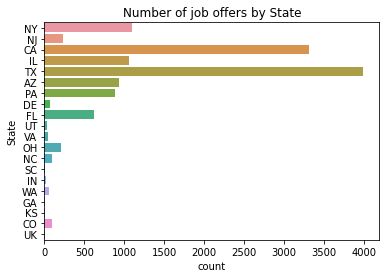

In [31]:
sb.countplot(y='State', data=ALL_Data).set_title("Number of job offers by State")

In [ ]:
ALL_Data.drop(['Headquarters'],axis=1,inplace=True)
ALL_Data.head(5)

Text(0.5, 1.0, 'Distribution of AverageSalary by State')

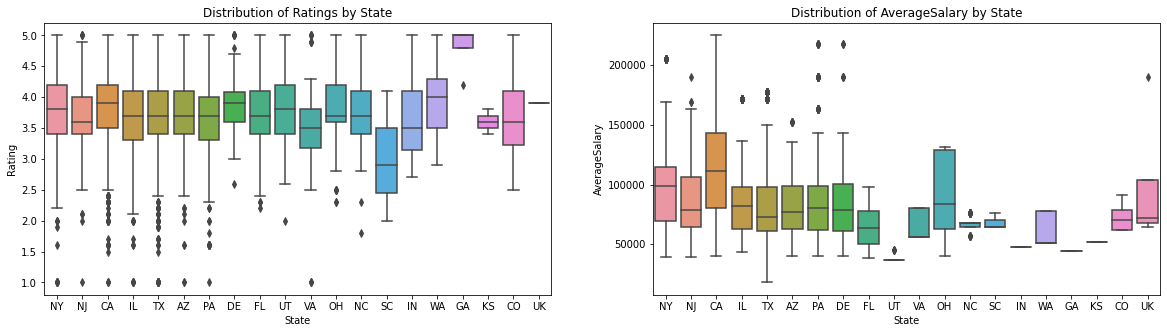

In [44]:
plt.rcParams["figure.figsize"] = (20,5)
fig, ax =plt.subplots(1,2)
sb.boxplot(x='State',y='Rating',data=ALL_Data,ax=ax[0]).set_title("Distribution of Ratings by State")
sb.boxplot(x='State',y='AverageSalary',data=ALL_Data,ax=ax[1]).set_title("Distribution of AverageSalary by State")

Text(0.5, 1.0, 'Number of job offers by Sector')

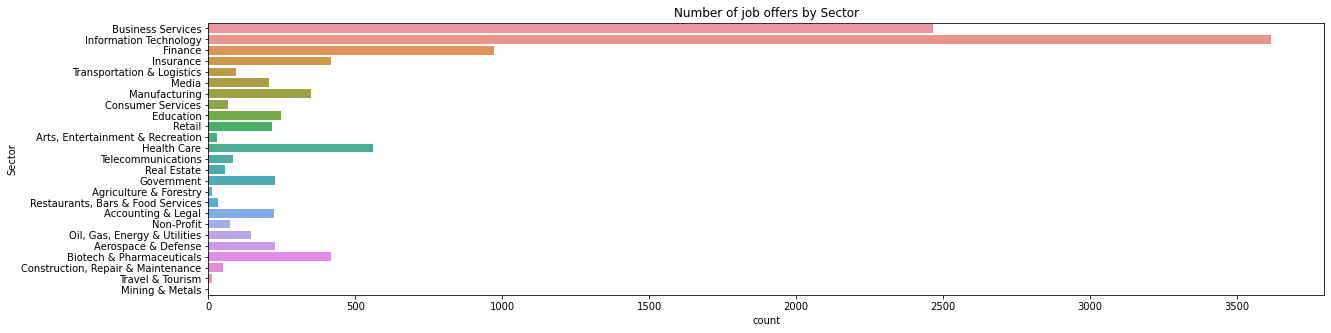

In [48]:
ALL_Data = ALL_Data.drop(ALL_Data[ALL_Data['Sector'] == "-1"].index,axis=0)
ALL_Data.reset_index(drop=True, inplace=True)
sb.countplot(y='Sector',data=ALL_Data).set_title("Number of job offers by Sector")

Text(0.5, 1.0, 'Distribution of AverageSalary by Sector')

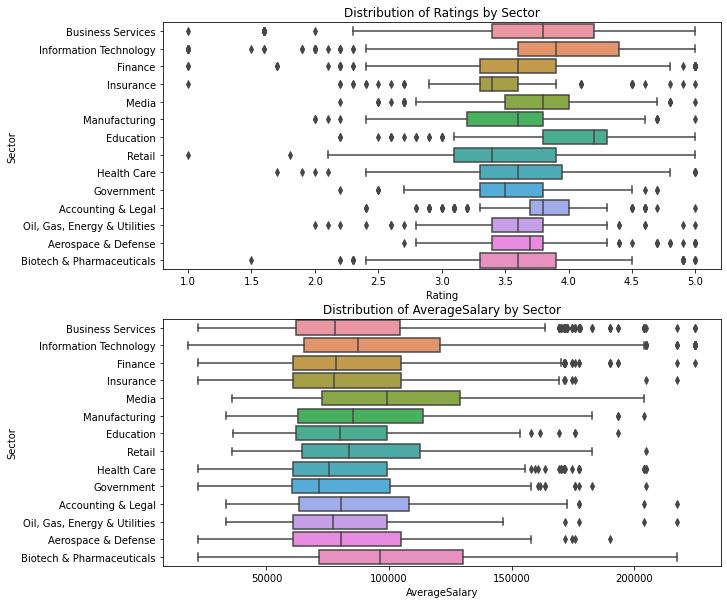

In [49]:
plt.rcParams["figure.figsize"] = (10,10)
plus100 = ALL_Data['Sector'].map(ALL_Data['Sector'].value_counts()) > 100 # More than 100 job offers
fig, ax = plt.subplots(2,1)
sb.boxplot(y='Sector',x='Rating',data=ALL_Data[plus100],ax=ax[0]).set_title("Distribution of Ratings by Sector")
sb.boxplot(y='Sector',x='AverageSalary',data=ALL_Data[plus100],ax=ax[1]).set_title("Distribution of AverageSalary by Sector")

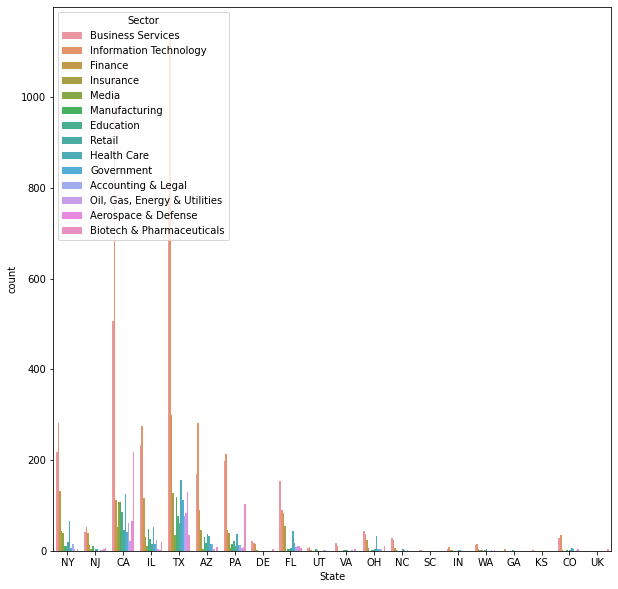

In [50]:
sb.countplot(x='State',hue='Sector',data=ALL_Data[plus100])

In [52]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [53]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud

stopWords = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')

def get_wordcloud(series): #simple function to tokenize and plot a said column
    word_cloud = ''
    
    for job in series:
        tokens = tokenizer.tokenize(job)
        for token in tokens:
            if token not in stopWords:
                word_cloud += ''.join(token) + ' '

    wordcloud = WordCloud(height=500,margin=0,max_words=300,
                          colormap='Set1').generate(word_cloud) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

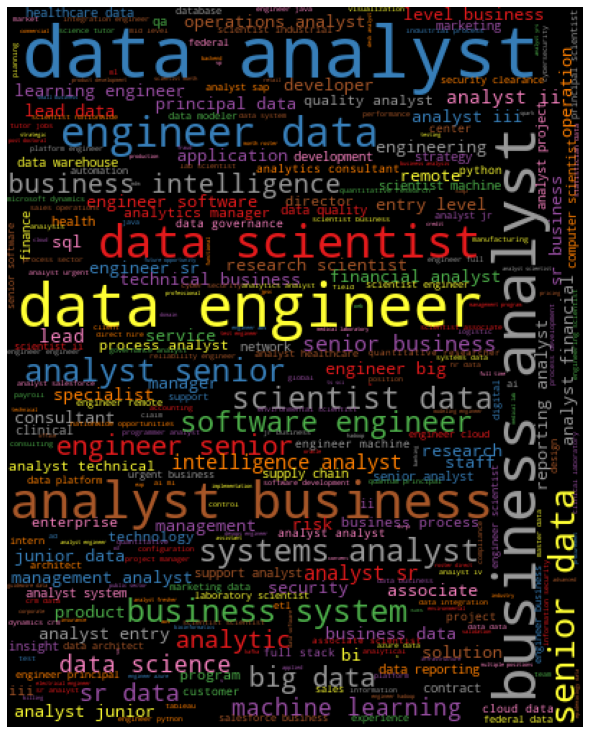

In [54]:
job_titles = ALL_Data['Job Title'].apply(lambda x: x.lower())

get_wordcloud(job_titles)

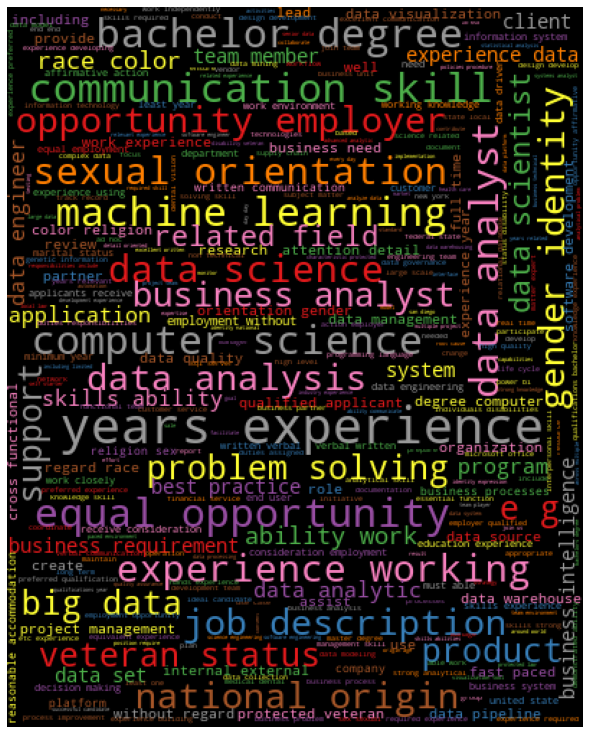

In [55]:
job_descrip = ALL_Data['Job Description'].apply(lambda x: x.lower())
get_wordcloud(job_descrip)